> SAÉ 2.04 - Exploitation d'une base de données  
> Auteurs : LEFRANCOIS Thibaut & DEMOUGE Colin  
> Date : 05/05/2023  
---
## Notebook 1 : Moyenne d'âge par type de chambre

#### Import des composants pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config

#### Connexion à la base de données

In [2]:
vconnect = cx_Oracle.connect(db_config.user, db_config.pwd, db_config.dsn)

#### Requête
Requête SQL qui retourne le nombre de réservations par chambre d'un hotêl d'ID = `v_id_hotel`

In [3]:
query = """
        SELECT tc.TYPE_CHAMBRE "Type Chambre", AVG(TRUNC(MONTHS_BETWEEN(sysdate, c.DATE_NAISSANCE)/12)) "Moyenne Age"
        FROM CHAMBRE ch
        JOIN HOTEL h ON ch.HOTEL = h.ID_HOTEL
        JOIN TYPE_CHAMBRE tc ON ch.TYPE = tc.ID_TYPE_CHAMBRE
        JOIN RESERVATION_CHAMBRE rc ON ch.ID_CHAMBRE = rc.CHAMBRE
        JOIN RESERVATION r ON rc.RESERVATION = r.ID_RESA
        JOIN CLIENT c ON r.CLIENT = c.ID_CLIENT
        WHERE h.ID_HOTEL = :v_id_hotel
        GROUP BY tc.TYPE_CHAMBRE
        """

Cette requête récupère des informations sur l'âge moyen des clients ayant réservé chaque type de chambre dans un hôtel spécifique, identifié par la variable liée `:v_id_hotel`.

La requête joint plusieurs tables : `CHAMBRE`, `HOTEL`, `TYPE_CHAMBRE`, `RESERVATION_CHAMBRE`, `RESERVATION`, et `CLIENT`.

Elle utilise la fonction `AVG` pour calculer la moyenne d'âge des clients ayant réservé chaque type de chambre. Pour ce faire, elle utilise la fonction `MONTHS_BETWEEN` pour calculer le nombre de mois entre la date actuelle (sysdate) et la date de naissance du client (`c.DATE_NAISSANCE`), et ensuite divise le résultat par 12 pour obtenir l'âge en années. La fonction `TRUNC` est utilisée pour arrondir l'âge moyen à l'entier inférieur.

La requête utilise la clause `WHERE` pour filtrer les résultats en ne prenant en compte que les réservations effectuées dans l'hôtel spécifié par la variable liée `:v_id_hotel`.

Enfin, la requête groupe les résultats par type de chambre en utilisant la clause `GROUP BY` sur la colonne`tc.TYPE_CHAMBRE`.

### Exécution de la requête

Récupération des données pour les 3 hotels dans 3 listes différentes

In [4]:
# Variables pour stocker les données des trois hôtels
hotel1_data = []
hotel2_data = []
hotel3_data = []

# Boucle pour exécuter la requête pour chaque hôtel
for id_hotel in range(1, 4):
    # Exécution de la requête SQL pour l'hôtel en cours
    vcursor = cx_Oracle.Cursor(vconnect)
    vcursor.execute(query, v_id_hotel=id_hotel)
    data = vcursor.fetchall()
    
    # Ajout des données à la variable correspondant à l'hôtel en cours
    if id_hotel == 1:
        hotel1_data = data
    elif id_hotel == 2:
        hotel2_data = data
    elif id_hotel == 3:
        hotel3_data = data
        
print(hotel1_data)
print(hotel2_data)
print(hotel3_data)

[('king', 60.06508875739645), ('queen', 60.164601769911506), ('double', 61.989010989010985), ('single', 61.03982300884956), ('quad', 60.50730994152047), ('triple', 59.9647577092511)]
[('king', 63.0514705882353), ('queen', 60.19285714285714), ('double', 61.376654632972325), ('single', 62.18490566037736), ('quad', 59.11538461538461), ('triple', 60.144578313253014)]
[('queen', 61.145907473309606), ('king', 56.6412213740458), ('double', 60.861835748792274), ('single', 60.77125748502994), ('quad', 60.90415335463259), ('triple', 59.87077826725404)]


### Visualisation des données récupérées

Installation (si nécéssaire) puis importation de la librairie `matplotlib` pour visualiser les données sous forme de diagrammes. 

In [5]:
!pip install matplotlib
import matplotlib.pyplot as plot

     |████████████████████████████████| 11.6 MB 2.7 MB/s            
     |████████████████████████████████| 1.6 MB 34.9 MB/s            
     |████████████████████████████████| 299 kB 38.2 MB/s            
     |████████████████████████████████| 17.3 MB 27.1 MB/s            
     |████████████████████████████████| 1.0 MB 33.3 MB/s            
     |████████████████████████████████| 3.4 MB 35.1 MB/s            


Création et modification des paramètres du diagramme baton souhaité

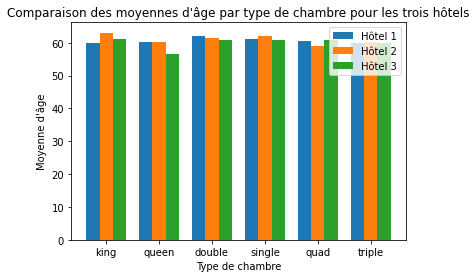

In [6]:
# Création du graphique avec les données des trois hôtels
fig, ax = plot.subplots()
ax.set_title('Comparaison des moyennes d\'âge par type de chambre pour les trois hôtels')
ax.set_xlabel('Type de chambre')
ax.set_ylabel('Moyenne d\'âge')

# Définir les positions des barres pour chaque type de chambre pour chaque hôtel
bar_width = 0.25
x1 = [i for i in range(len(hotel1_data))]
x2 = [i + bar_width for i in x1]
x3 = [i + bar_width for i in x2]

# Afficher les barres pour chaque hôtel
ax.bar(x1, [x[1] for x in hotel1_data], width=bar_width, label='Hôtel 1')
ax.bar(x2, [x[1] for x in hotel2_data], width=bar_width, label='Hôtel 2')
ax.bar(x3, [x[1] for x in hotel3_data], width=bar_width, label='Hôtel 3')

# Ajouter des étiquettes pour chaque type de chambre
ax.set_xticks(x2)
ax.set_xticklabels([x[0] for x in hotel1_data])

# Afficher la légende et le graphique
ax.legend()
plot.show()


### Analyse

Ici, on voit que la moyenne d'âge générale est d'environ 60 ans, les 3 hôtels ont pratiquement la même moyenne d'âge peut importe le type de chambre.

### Fin de l'exécution de la requête

In [7]:
vcursor.close()
vconnect.close()